In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


in this project I'll be descovering and cleaning the dataset hotel source:
https://www.kaggle.com/jessemostipak/hotel-booking-demand?select=hotel_bookings.csv
We are trying to findout what is the best time of the year to book a room


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hotel_original = pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')
hotel_cleaned = hotel_original.copy()
hotel_original

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
hotel_original.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Not usefull coloums

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf910538d0>,
      dtype=object)

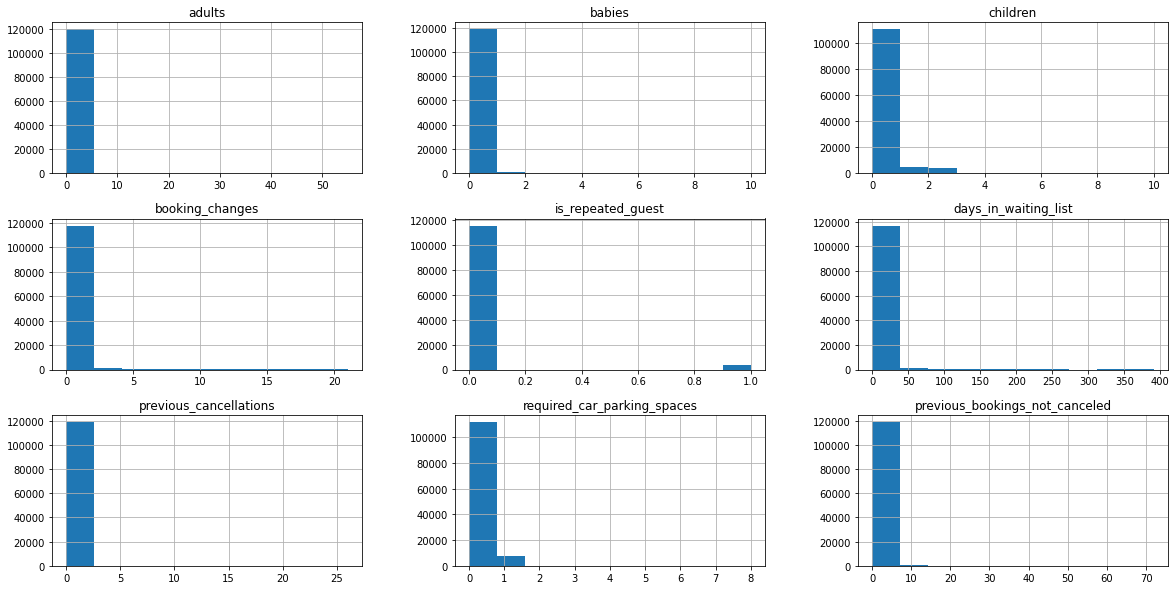

In [8]:
quality_issue_coloumns = hotel_original[['adults',
                                         'babies',
                                         'children',
                                         'booking_changes',
                                         'is_repeated_guest',
                                         'days_in_waiting_list',
                                         'previous_cancellations', 
                                         'required_car_parking_spaces',
                                         'previous_bookings_not_canceled']]
quality_issue_coloumns.hist(figsize=(20,10))

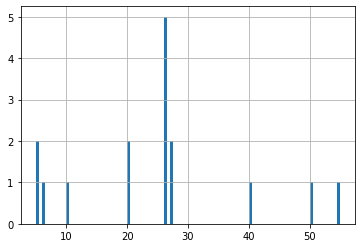

In [9]:
hotel_original['adults'][(hotel_original['adults'] > 4)].hist(bins= 100) # we will remove values more than 4

1570 records (more than 3):


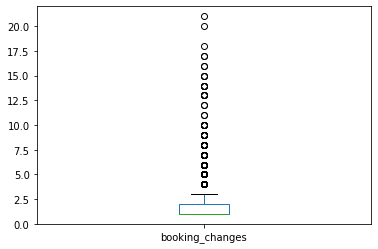

In [10]:
hotel_original['booking_changes'][hotel_original['booking_changes'] > 0].plot(kind='box')
print(hotel_original['booking_changes'][hotel_original['booking_changes'] >= 3].shape[0], 'records (more than 3):')

In [11]:
print(
    hotel_original.company.isna().sum(), # need to be removed
    hotel_original.agent.isna().sum(),   # need removing nulls
    hotel_original.country.isna().sum()  # need remoring nulls
)

112593 16340 488


# Outliers

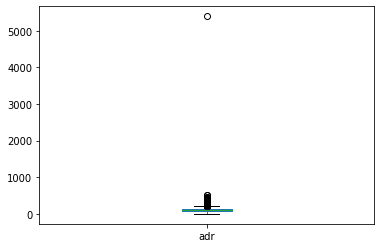

In [12]:
hotel_original.adr.plot(kind='box')


it seems as expexted adr has huge outliers and negative values will be removed

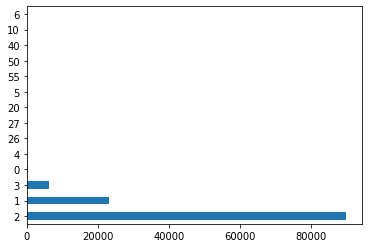

In [13]:
hotel_original.adults.value_counts().plot(kind='barh')

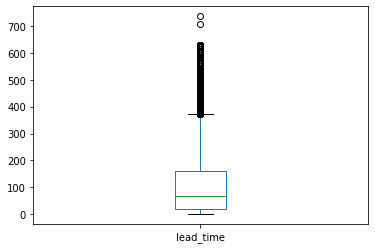

In [14]:
hotel_original.lead_time.plot(kind='box')

First step is to remove the dublicates 

In [15]:
hotel_cleaned.drop_duplicates(inplace=True)
hotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

then we remove quality issues

In [16]:
#unwanted col 
hotel_cleaned.drop(
    columns=[
        'babies',
        'children',
        'is_repeated_guest',
        'days_in_waiting_list',
        'previous_cancellations',
        'required_car_parking_spaces',
        'previous_bookings_not_canceled'
    ], inplace=True
)
hotel_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,C,C,3,No Deposit,NaN,NaN,Transient,0.0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,C,C,4,No Deposit,NaN,NaN,Transient,0.0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,BB,GBR,Direct,Direct,A,C,0,No Deposit,NaN,NaN,Transient,75.0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,BB,GBR,Corporate,Corporate,A,A,0,No Deposit,304.0,NaN,Transient,75.0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,BB,GBR,Online TA,TA/TO,A,A,0,No Deposit,240.0,NaN,Transient,98.0,1,Check-Out,2015-07-03


then we work on the outliers

@ hotel_cleaned.reservation_status_date.hist()

In [17]:
#removing records where country is null
hotel_cleaned.drop(columns='company', inplace=True)
hotel_cleaned.dropna(subset=['country', 'agent'], inplace=True)
#hotel_cleaned.drop(hotel_cleaned['meal'] == 'Undefined', inplace=True)
#hotel_cleaned[hotel_cleaned['meal'] != 'Undefined']hotel_cleaned.drop(hotel_cleaned['distribution_channel'] == 'Undefined', inplace=True)
hotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75076 entries, 3 to 119389
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hotel                      75076 non-null  object 
 1   is_canceled                75076 non-null  int64  
 2   lead_time                  75076 non-null  int64  
 3   arrival_date_year          75076 non-null  int64  
 4   arrival_date_month         75076 non-null  object 
 5   arrival_date_week_number   75076 non-null  int64  
 6   arrival_date_day_of_month  75076 non-null  int64  
 7   stays_in_weekend_nights    75076 non-null  int64  
 8   stays_in_week_nights       75076 non-null  int64  
 9   adults                     75076 non-null  int64  
 10  meal                       75076 non-null  object 
 11  country                    75076 non-null  object 
 12  market_segment             75076 non-null  object 
 13  distribution_channel       75076 non-null  ob

#children from float to int
hotel_cleaned.children.loc[hotel_cleaned.children.isnull()]=0
hotel_cleaned.children=hotel.children.astype(int)

In [18]:
#removing outliers from adults
outliers = hotel_cleaned[['adr', 'lead_time']]
desc = outliers.describe()
Q1 = desc.loc['25%']
Q3 = desc.loc['75%']
IQR = Q3 - Q1
IQR_thresh = IQR * 1.5
for col in desc.columns:
    min_thresh = max(Q1[col] - IQR_thresh[col], 0)
    max_thresh = min(Q3[col] + IQR_thresh[col], desc.loc['max'][col])
    print([col, min_thresh, max_thresh])
    hotel_cleaned = hotel_cleaned[
            (hotel_cleaned[col] > min_thresh) &
            (hotel_cleaned[col] < max_thresh)
    ]
hotel_cleaned = hotel_cleaned[hotel_cleaned['adults'] <= 4]
hotel_cleaned = hotel_cleaned[hotel_cleaned['booking_changes'] <= 3]
hotel_cleaned = hotel_cleaned[hotel_cleaned['meal'] != 'Undefined']
hotel_cleaned = hotel_cleaned[hotel_cleaned['distribution_channel'] != 'Undefined']
hotel_cleaned.describe()

['adr', 0, 228.06874999999997]
['lead_time', 0, 308.0]


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,booking_changes,agent,adr,total_of_special_requests
count,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000,67074.000000
mean,0.302949,83.546247,2016.215553,26.735680,15.784462,1.087038,2.777157,1.929585,0.208069,88.667666,107.532022,0.750827
std,0.459537,74.700870,0.679572,13.457453,8.849190,1.019277,1.997427,0.468539,0.537672,110.682751,42.403606,0.830700
min,0.000000,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000
25%,0.000000,21.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,9.000000,77.000000,0.000000
50%,0.000000,61.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,9.000000,101.000000,1.000000
75%,1.000000,131.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,240.000000,134.100000,1.000000
max,1.000000,307.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,4.000000,3.000000,535.000000,228.000000,5.000000


In [19]:
#from mounth to number using dictionary
months = {
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}
hotel_cleaned.arrival_date_month = hotel_cleaned.arrival_date_month.map(months)

In [20]:
hotel_cleaned['reservation_status_date'] = pd.to_datetime(hotel_cleaned['reservation_status_date'])


descovering the data and looking for null/ NA values

In [21]:

hotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67074 entries, 3 to 119389
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hotel                      67074 non-null  object        
 1   is_canceled                67074 non-null  int64         
 2   lead_time                  67074 non-null  int64         
 3   arrival_date_year          67074 non-null  int64         
 4   arrival_date_month         67074 non-null  int64         
 5   arrival_date_week_number   67074 non-null  int64         
 6   arrival_date_day_of_month  67074 non-null  int64         
 7   stays_in_weekend_nights    67074 non-null  int64         
 8   stays_in_week_nights       67074 non-null  int64         
 9   adults                     67074 non-null  int64         
 10  meal                       67074 non-null  object        
 11  country                    67074 non-null  object        
 12  mar

In [22]:
type(hotel_cleaned['reservation_status_date'].iloc[0])
time = hotel_cleaned['reservation_status_date'].iloc[0]
hotel_cleaned['Month'] = hotel_cleaned['reservation_status_date'].apply(lambda time:time.month)
hotel_cleaned['DayofWeek'] = hotel_cleaned['reservation_status_date'].apply(lambda time:time.dayofweek)
hotel_cleaned['year'] = hotel_cleaned['reservation_status_date'].apply(lambda time:time.year)


In [23]:
hotel_cleaned=hotel_cleaned.drop('reservation_status_date',axis=1)

In [24]:
hotel_cleaned.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status,Month,DayofWeek,year
112237,City Hotel,0,32,2017,5,20,19,1,2,2,BB,BEL,Direct,Direct,A,A,3,No Deposit,14.0,Transient,170.00,2,Check-Out,5,0,2017
115983,City Hotel,0,9,2017,7,28,12,0,1,2,SC,DEU,Online TA,TA/TO,A,A,0,No Deposit,9.0,Transient,120.00,1,Check-Out,7,3,2017
62759,City Hotel,1,59,2017,1,3,21,2,1,2,BB,FRA,Online TA,TA/TO,D,D,0,No Deposit,9.0,Transient,102.60,0,Canceled,11,3,2016
16538,Resort Hotel,0,35,2015,8,35,29,2,2,2,BB,ROU,Online TA,TA/TO,A,D,0,No Deposit,240.0,Transient,96.30,2,Check-Out,9,2,2015
6942,Resort Hotel,1,244,2016,7,29,12,2,5,1,BB,PRT,Online TA,TA/TO,A,A,1,No Deposit,240.0,Transient,84.47,1,Canceled,12,1,2015


In [25]:
hotel_cleaned.hotel=hotel_cleaned.hotel.map({'Resort Hotel': 0, 'City Hotel': 1})

In [26]:
hotel_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status,Month,DayofWeek,year
3,0,0,13,2015,7,27,1,0,1,1,BB,GBR,Corporate,Corporate,A,A,0,No Deposit,304.0,Transient,75.0,0,Check-Out,7,3,2015
4,0,0,14,2015,7,27,1,0,2,2,BB,GBR,Online TA,TA/TO,A,A,0,No Deposit,240.0,Transient,98.0,1,Check-Out,7,4,2015
7,0,0,9,2015,7,27,1,0,2,2,FB,PRT,Direct,Direct,C,C,0,No Deposit,303.0,Transient,103.0,1,Check-Out,7,4,2015
8,0,1,85,2015,7,27,1,0,3,2,BB,PRT,Online TA,TA/TO,A,A,0,No Deposit,240.0,Transient,82.0,1,Canceled,5,2,2015
9,0,1,75,2015,7,27,1,0,3,2,HB,PRT,Offline TA/TO,TA/TO,D,D,0,No Deposit,15.0,Transient,105.5,0,Canceled,4,2,2015


In [27]:
#classfication
hotel_cleaned['arrival_date_month'] = hotel_cleaned['arrival_date_month'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['arrival_date_month']=le.fit_transform(hotel_cleaned['arrival_date_month'])
hotel_cleaned['arrival_date_month']

3          9
4          9
7          9
8          9
9          9
          ..
119385    10
119386    10
119387    10
119388    10
119389    10
Name: arrival_date_month, Length: 67074, dtype: int64

In [28]:
hotel_cleaned['reservation_status'] = hotel_cleaned['reservation_status'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['reservation_status']=le.fit_transform(hotel_cleaned['reservation_status'])
hotel_cleaned['reservation_status']


3         1
4         1
7         1
8         0
9         0
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: reservation_status, Length: 67074, dtype: int64

In [29]:
hotel_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,total_of_special_requests,reservation_status,Month,DayofWeek,year
3,0,0,13,2015,9,27,1,0,1,1,BB,GBR,Corporate,Corporate,A,A,0,No Deposit,304.0,Transient,75.0,0,1,7,3,2015
4,0,0,14,2015,9,27,1,0,2,2,BB,GBR,Online TA,TA/TO,A,A,0,No Deposit,240.0,Transient,98.0,1,1,7,4,2015
7,0,0,9,2015,9,27,1,0,2,2,FB,PRT,Direct,Direct,C,C,0,No Deposit,303.0,Transient,103.0,1,1,7,4,2015
8,0,1,85,2015,9,27,1,0,3,2,BB,PRT,Online TA,TA/TO,A,A,0,No Deposit,240.0,Transient,82.0,1,0,5,2,2015
9,0,1,75,2015,9,27,1,0,3,2,HB,PRT,Offline TA/TO,TA/TO,D,D,0,No Deposit,15.0,Transient,105.5,0,0,4,2,2015


In [30]:
hotel_cleaned['customer_type'] = hotel_cleaned['customer_type'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['customer_type']=le.fit_transform(hotel_cleaned['customer_type'])
hotel_cleaned['customer_type']

3         2
4         2
7         2
8         2
9         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 67074, dtype: int64

In [31]:
hotel_cleaned['deposit_type'] = hotel_cleaned['deposit_type'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['deposit_type']=le.fit_transform(hotel_cleaned['deposit_type'])
hotel_cleaned['deposit_type']

3         0
4         0
7         0
8         0
9         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 67074, dtype: int64

In [32]:
hotel_cleaned['agent'] = hotel_cleaned['agent'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['agent']=le.fit_transform(hotel_cleaned['agent'])
hotel_cleaned['agent']

3         151
4         100
7         150
8         100
9          39
         ... 
119385    207
119386    301
119387    301
119388    300
119389    301
Name: agent, Length: 67074, dtype: int64

In [33]:
hotel_cleaned.adr

3          75.00
4          98.00
7         103.00
8          82.00
9         105.50
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 67074, dtype: float64

In [34]:
from sklearn.preprocessing import LabelEncoder
hotel_cleaned['adr'] = hotel_cleaned['adr'].astype('str')
le = LabelEncoder()
hotel_cleaned['adr']=le.fit_transform(hotel_cleaned['adr'])
hotel_cleaned['adr']

3         6271
4         7616
7          182
8         6680
9          329
          ... 
119385    7521
119386    4267
119387    2651
119388     268
119389    2417
Name: adr, Length: 67074, dtype: int64

In [35]:
#Before
hotel_cleaned.meal.sample(10)

84331     BB
36972     HB
92870     BB
839       BB
21130     HB
88804     SC
64885     BB
98949     BB
118548    BB
97780     BB
Name: meal, dtype: object

In [36]:
#After
hotel_cleaned['meal'] = hotel_cleaned['meal'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['meal']=le.fit_transform(hotel_cleaned['meal'])
hotel_cleaned.meal.sample(5)

87539    2
72277    0
7047     0
45544    0
51286    0
Name: meal, dtype: int64

In [37]:
hotel_cleaned['assigned_room_type'] = hotel_cleaned['assigned_room_type'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['assigned_room_type']=le.fit_transform(hotel_cleaned['assigned_room_type'])
hotel_cleaned['country'] = hotel_cleaned['country'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['country']=le.fit_transform(hotel_cleaned['country'])
hotel_cleaned['distribution_channel'] = hotel_cleaned['distribution_channel'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['distribution_channel']=le.fit_transform(hotel_cleaned['distribution_channel'])
hotel_cleaned['market_segment'] = hotel_cleaned['market_segment'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['market_segment']=le.fit_transform(hotel_cleaned['market_segment'])
hotel_cleaned['reserved_room_type'] = hotel_cleaned['reserved_room_type'].astype('str')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hotel_cleaned['reserved_room_type']=le.fit_transform(hotel_cleaned['reserved_room_type'])




In [38]:
hotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67074 entries, 3 to 119389
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   hotel                      67074 non-null  int64
 1   is_canceled                67074 non-null  int64
 2   lead_time                  67074 non-null  int64
 3   arrival_date_year          67074 non-null  int64
 4   arrival_date_month         67074 non-null  int64
 5   arrival_date_week_number   67074 non-null  int64
 6   arrival_date_day_of_month  67074 non-null  int64
 7   stays_in_weekend_nights    67074 non-null  int64
 8   stays_in_week_nights       67074 non-null  int64
 9   adults                     67074 non-null  int64
 10  meal                       67074 non-null  int64
 11  country                    67074 non-null  int64
 12  market_segment             67074 non-null  int64
 13  distribution_channel       67074 non-null  int64
 14  reserved_room_type   

In [39]:
#classfication
import numpy as nm
from sklearn import tree
from sklearn.model_selection import train_test_split
X = nm.array(hotel_cleaned.drop(columns=['hotel']))
Y = nm.array(hotel_cleaned['hotel'])
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5, random_state=33)
train_test_split(Y, shuffle=False)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [40]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [41]:
from sklearn import metrics
print('accuracy: ',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy:  98.40176521453915 %


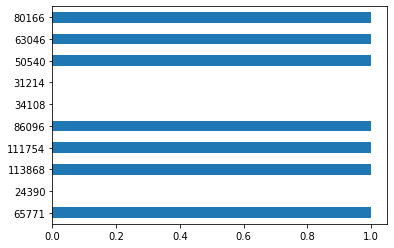

In [43]:
hotel_cleaned.hotel.sample(10).plot(kind='barh')